 ![Biodiversity in National Parks Image](Biodiversity_National_Parks.png "Biodiversity in National Parks")

# Introduction

The aim of this project is to explore the dataset and analyze endangered species in U.S.A. national parks, identifying similarities and patterns, and acquire an understanding about the number and scope of endangered species in those parks. Through this analysis, I aim to enhance understanding of endangered species, contribute to the survival of at-risk species, and support the parks in maintaining their biodiversity.
<br>The project consists of loading a dataset that was available through the Codecademy platform, and I'll be running summary statistics on that data, making correlations, and looking at relationships between species, parks, and each other acquiring insights about the species and the parks.

# Goals

In this project I'll be using data from the National Parks Service about endangered animal species in different national parks. I'll be looking for any patterns or themes in the types of species that become endangered and answering some questions about those species and the parks, such as:
* What is the distribution of the species that become endangered?
* Are certain species more likely to become endangered?
* Which are the parks with the least and the most endangered species?
* Is there a categoty with more endangered species, and is it the same across all parks?

# Data

The data provided for this project is made available through the [Codecademy'((https://www.codecademy.com) platform and consists of two files: `species_info.csv` has information about the animals' species and `observations.csv` has counts of observations of species with park locations.

# Analysis

In this project, I will use descriptive statistics and data visualization techniques to analyze the data, as well as statistical inference to determine whether our values are significant.
<br>Key metrics include:
* Summary statistics
* Distributions
* Correlations and relationships

### Initializing the libraries that are being used and importing the datasets

In [1]:
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Importing chi2 test for the contingency table and statistical inference
from scipy.stats import chi2_contingency

# Datasets
species = pd.read_csv('species_info.csv')
obs = pd.read_csv('observations.csv')

# Printing the first five rows of our Datasets to confirm everything is OK
display('Species:',species.head())
display('Observations:',obs.head())

'Species:'

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


'Observations:'

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Confirming the integrity of data and overview of general shape

In [2]:
# Checking the number of columns and rows for each DataFrame, as well as the names of the columns, 
# and using summary statistics to get information on them
display('Species shape:',np.shape(species))
display(species.columns)
display(species.describe())

display('Observations shape:',np.shape(obs))
display(obs.columns)
display(obs.describe(include = 'all'))


'Species shape:'

(5824, 4)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Procyon lotor,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


'Observations shape:'

(23296, 3)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Puma concolor,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


The `Species` DataFrame has 5824 rows and 4 columns. The columns are `category`, which contains the class of the animal, `scientific_name` and `common_names`, which are self-explainatory, and `conservation_status`, containing each species' conservation status. There are seven categories of animals, and there are 4 conservation status, which we'll investigate next. It can also be observed that the `conservation_status` is the only column in both our DataFrames that has `NULL` values, containing (5824-191) 5633 empty values.<br>
As duplicated data is irrelevant in this case, we'll drop the duplicates to have only different species in each row. We'll keep the last row added as it should be the one with the most up-to-date information, in case there are disparities.

The `Observations` DataFrame has 23296 rows and 3 columns, named `scientific_name`, with the animal's scientific name, `park_name`, containing the park where the observation was made, and `observations`, with a count of how many times that species was observed at that park. There are 5541 different animals observed and our data comes from 4 national parks. 

In [3]:
# Dropping the duplicates, but keeping the last entry
species = species.drop_duplicates(subset ='scientific_name', keep ='last')

In [4]:
# Displaying the unique values of the relevant categorical columns to check their values
display('Animal Classes:',species['category'].unique())
display('Conservation Status:', species['conservation_status'].unique())
display('Parks: ', obs['park_name'].unique())

'Animal Classes:'

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

'Conservation Status:'

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

'Parks: '

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

Above we can see the values that make up the `category`, `conservation_status`, and `park_name` columns. The `conservation_status` column presents an empty value for species that are not endangered. Instead of having the value `NaN`, the empty cells will be replaced with the string `Least Concern`.

In [5]:
# Replacing the empty values on `conservation_status` to `Least Concern`
species = species.fillna(value='Least Concern')

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,"American Bison, Bison",Least Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern
7,Mammal,Canis latrans,Coyote,Species of Concern


### Visualizations

Now we can interpret the data with some visualizations.

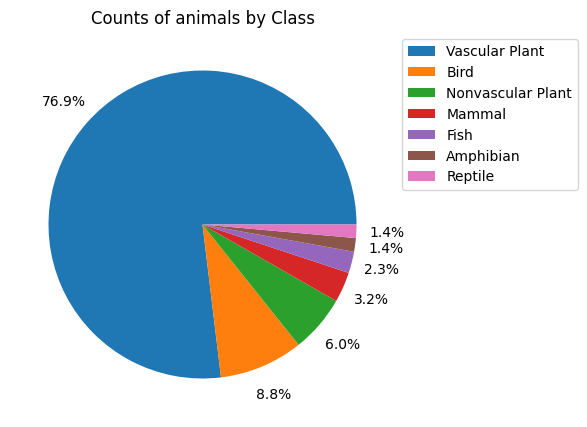

In [6]:
# Creating a plot to visualize how the species is divided within its categories
plt.figure(figsize = (9,5))
plt.title('Counts of animals by Class')

counts = species['category'].value_counts()

plt.pie(x = counts, autopct = '%.1f%%', pctdistance =1.2)
plt.legend(labels = counts.index, bbox_to_anchor = (1,1))
plt.savefig('Animal_counts_by_class.png')
plt.show()


It seems most entries in our database are `Vascular Plant`, making up more than three-thirds of the records. The next two biggest groups are `Bird` with 8.8% and `Nonvascular Plant` with 6.0%.

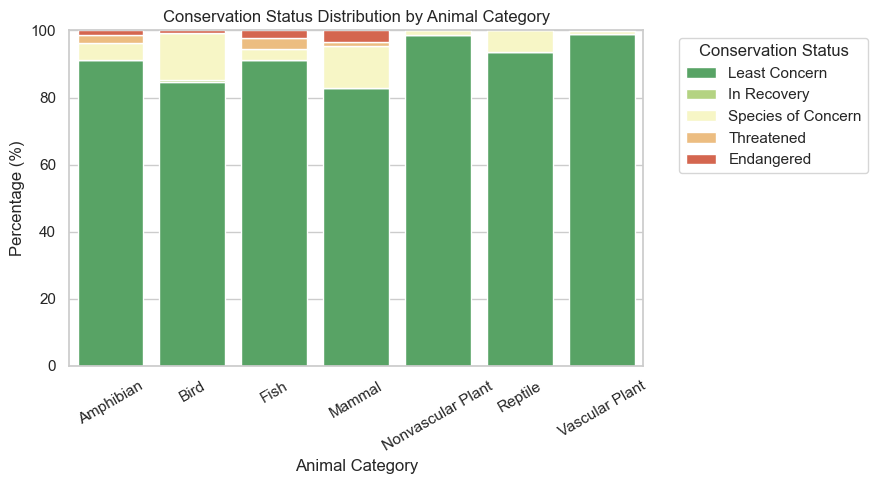

In [16]:
# Defining desired order of conservation statuses
status_order = ['Least Concern', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered']

# Creating a normalized crosstab
ct = pd.crosstab(species['category'], species['conservation_status'], normalize='index') * 100

# Keep only statuses present in data, and sort by the custom order
ct = ct[[col for col in status_order if col in ct.columns]]

# Melt to long format for Seaborn
ct = ct.reset_index().melt(id_vars='category', var_name='conservation_status', value_name='percentage')

# Plot stacked bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))

bottoms = pd.Series(0.0, index=ct['category'].unique())

# Use Seaborn color palette (light-to-dark gradient)
palette = sns.color_palette("RdYlGn_r", n_colors=len(ct['conservation_status'].unique()))

for status, color in zip(ct['conservation_status'].unique(), palette):
    subset = ct[ct['conservation_status'] == status]
    sns.barplot(x='category', y='percentage', data=subset, label=status, color=color, bottom=bottoms.loc[subset['category']].values)
    bottoms[subset['category']] += subset['percentage'].values

plt.ylabel('Percentage (%)')
plt.xlabel('Animal Category')
plt.tick_params(axis = 'x', labelrotation = 30)
plt.title('Conservation Status Distribution by Animal Category')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Full_Conservation_st_by_category.png')
plt.show()

The categories of least concern are `Vascular Plant`, `Nonvascular Plant` and `Reptile`, followed by `Fish`. This plot shows us the spread for all species, but we can get a better view at the concerning conservation statuses if we replot without using the `Least Concern` species:

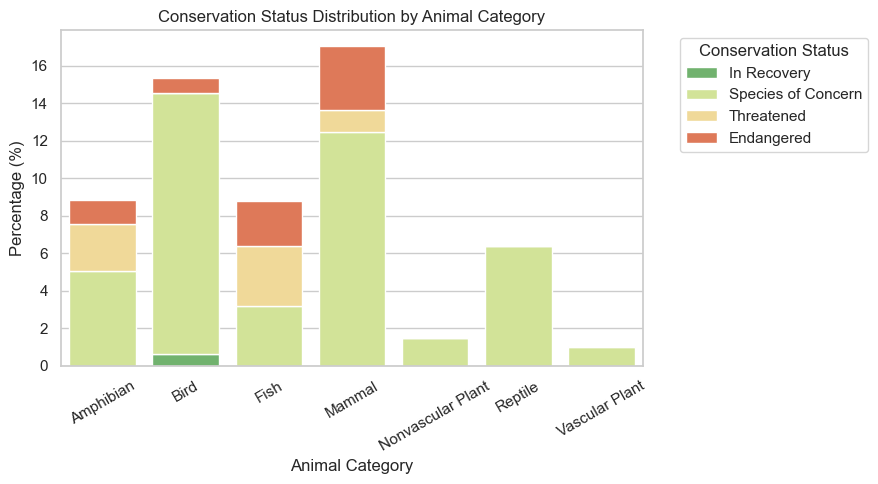

In [8]:
# Defining desired order of conservation statuses
status_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']

# Creating a normalized crosstab
ct = pd.crosstab(species['category'], species['conservation_status'], normalize='index') * 100

# Keep only statuses present in data, and sort by the custom order
ct = ct[[col for col in status_order if col in ct.columns]]

# Melt to long format for Seaborn
ct = ct.reset_index().melt(id_vars='category', var_name='conservation_status', value_name='percentage')

# Plot stacked bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))

bottoms = pd.Series(0.0, index=ct['category'].unique())

# Use Seaborn color palette (light-to-dark gradient)
palette = sns.color_palette("RdYlGn_r", n_colors=len(ct['conservation_status'].unique()))

for status, color in zip(ct['conservation_status'].unique(), palette):
    subset = ct[ct['conservation_status'] == status]
    sns.barplot(x='category', y='percentage', data=subset, label=status, color=color, bottom=bottoms.loc[subset['category']].values)
    bottoms[subset['category']] += subset['percentage'].values

plt.ylabel('Percentage (%)')
plt.xlabel('Animal Category')
plt.tick_params(axis = 'x', labelrotation = 30)
plt.title('Conservation Status Distribution by Animal Category')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Conservation_st_by_category.png')
plt.show()

The above image shows us that the class with the most `Endangered` specimens is `Fish`, followed by `Mammal`. Fish have more `Threatened` species, followed by `Amphibian`, meaning that `Fish` have a bigger percentage of species that generate concern about their conservation status.

In [9]:
# Adding a column to obs with the conservation status, so we can check the spread of conservation status on all parks
obs = obs.merge(species[['scientific_name', 'conservation_status']], on='scientific_name', how='left')

# Confirming our changes took effect
display(obs.head())

,scientific_name,park_name,observations,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Least Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Least Concern
2,Prunus subcordata,Yosemite National Park,138,Least Concern
3,Abutilon theophrasti,Bryce National Park,84,Least Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Least Concern


conservation_status,In Recovery,Species of Concern,Threatened,Endangered
park_name,,,,
Bryce National Park,0.051511,2.764423,0.188874,0.291896
Great Smoky Mountains National Park,0.051511,2.764423,0.188874,0.291896
Yellowstone National Park,0.051511,2.764423,0.188874,0.291896
Yosemite National Park,0.051511,2.764423,0.188874,0.291896


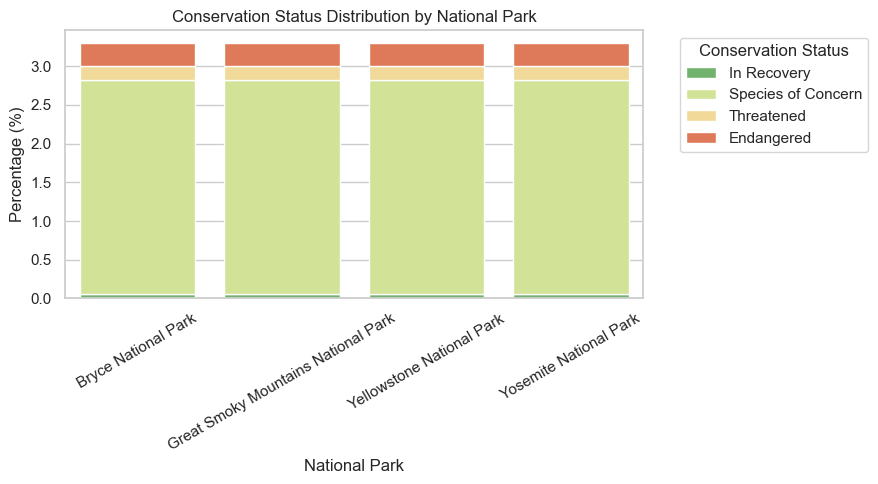

In [10]:
# Defining desired order of conservation statuses while ignoring 'Least Concern' as the percentage of those species would be to big making other
# values hard to see on plot
status_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']

# Creating a normalized crosstab
ct = pd.crosstab(obs['park_name'], obs['conservation_status'], normalize='index') * 100

# Keep only statuses present in data, and sort by the custom order
ct = ct[[col for col in status_order if col in ct.columns]]
display(ct)

# Melt to long format for Seaborn
ct = ct.reset_index().melt(id_vars='park_name', var_name='conservation_status', value_name='percentage')

# Plot stacked bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))

bottoms = pd.Series(0.0, index=ct['park_name'].unique())

# Use Seaborn color palette (light-to-dark gradient)
palette = sns.color_palette("RdYlGn_r", n_colors=len(ct['conservation_status'].unique()))

for status, color in zip(ct['conservation_status'].unique(), palette):
    subset = ct[ct['conservation_status'] == status]
    sns.barplot(x='park_name', y='percentage', data=subset, label=status, color=color, bottom=bottoms.loc[subset['park_name']].values)
    bottoms[subset['park_name']] += subset['percentage'].values

plt.ylabel('Percentage (%)')
plt.xlabel('National Park')
plt.tick_params(axis = 'x', labelrotation = 30)
plt.title('Conservation Status Distribution by National Park')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Conservation_st_by_park.png')
plt.show()

It seems that all parks have the same number of `Endanegred` and `Threatened` species, this is possibly due to all species that fit that criteria being seen in the four parks.

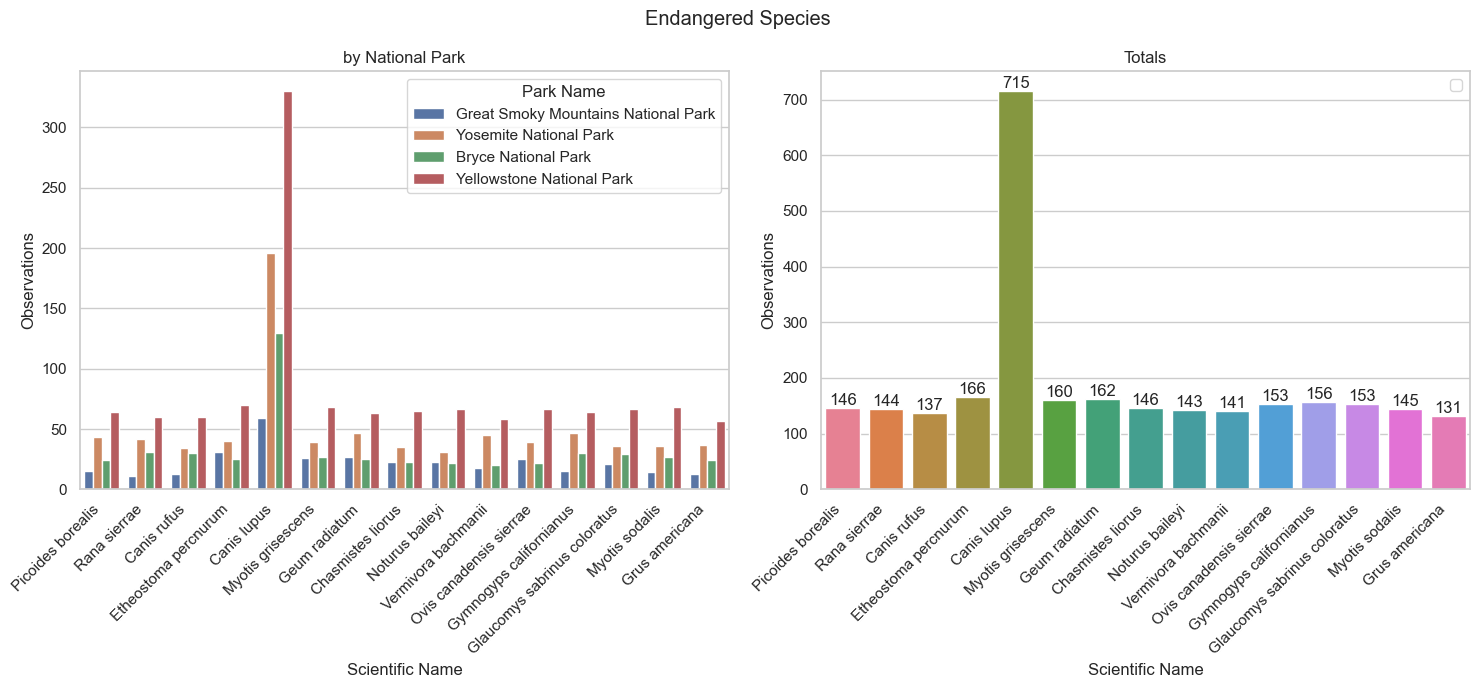

In [11]:
plt.figure(figsize=(15,7))
plt.suptitle('Endangered Species')

plt.subplot(1,2,1)
plt.title('by National Park')
sns.barplot(x = obs[obs['conservation_status'] == 'Endangered']['scientific_name'], y = obs['observations'], estimator = 'sum', 
            hue = obs['park_name'], errorbar = None)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Observations')
plt.xlabel('Scientific Name')
plt.legend(title = 'Park Name')

plt.subplot(1,2,2)
plt.title('Totals')
ax = sns.barplot(x = obs[obs['conservation_status'] == 'Endangered']['scientific_name'], y = obs['observations'], estimator = 'sum',
            hue = obs[obs['conservation_status'] == 'Endangered']['scientific_name'], errorbar = None)
plt.xticks(rotation = 45, ha = 'right')
# Adding the count on top of the bars
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Observations')
plt.xlabel('Scientific Name')
plt.legend(labels = '')

plt.savefig('Endangered_species.png')
plt.tight_layout()
plt.show()

We can see that from the 15 species currently labeled as `Endangered`, `Canis Lupus` is the one that was observed the most, vastly surpassing the number of observations of any other species. The Grus americana is the endangered species that was observed the least, with only 131 observations across all parks.

We can also find out which animal from each Class is the most endangered, by adding the bumber of times the endangered animals were seen in all parks:

In [12]:
most_endangered = obs[obs['conservation_status'] == 'Endangered'].groupby('scientific_name', as_index=False)['observations'].sum()

# Merge category from species dataframe
most_endangered = most_endangered.merge(species[['scientific_name', 'category']], on='scientific_name', how='left')

least_observed = (most_endangered.sort_values(['category', 'observations']).groupby('category', group_keys=False).head(1))

display(least_observed)


,scientific_name,observations,category
13,Rana sierrae,144,Amphibian
6,Grus americana,131,Bird
10,Noturus baileyi,143,Fish
1,Canis rufus,137,Mammal
4,Geum radiatum,162,Vascular Plant


The list above shows the scientific names of the species that were less seen in all parks and that are classified as `Endangered`.

### Statistical Inference

To confirm if the differences between the species and their conservation statuses are significant, we'll create a contingency table where we compare the different classes (or categories) to the different conservation statuses, and we'll create a null hypothesis that dictates that a species' conservation status and its category are independent.

In [13]:
ct = pd.crosstab(species['category'], species['conservation_status'])

display(ct)

conservation_status,Endangered,In Recovery,Least Concern,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,72,4,2
Bird,4,3,413,68,0
Fish,3,0,114,4,4
Mammal,6,0,146,22,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,73,5,0
Vascular Plant,1,0,4216,43,2


Based on the contingency table displayed above, it's possible to run a Chi Squared test:

In [14]:
chi2, pval, dof, expected = chi2_contingency(ct)

display('The P-value of our contingency table is:', pval)

'The P-value of our contingency table is:'

np.float64(1.6816257270187694e-109)

As the P-value that was returned is much below our threshold (0.05) at 0.00002, it is higly significant, and we can reject the null hypothesis, confirming that there seems to be an association between the species category and its conservation status, as it's highly unlikely that the values produced are purely by chance.

We can find out how the conservation status is spread across the categories:

In [15]:
risk_table = round(pd.crosstab(species['category'], species['conservation_status'], normalize='index') * 100,2)
display(risk_table.sort_values('Endangered', ascending=False))

conservation_status,Endangered,In Recovery,Least Concern,Species of Concern,Threatened
category,,,,,
Mammal,3.41,0.00,82.95,12.50,1.14
Fish,2.40,0.00,91.20,3.20,3.20
Amphibian,1.27,0.00,91.14,5.06,2.53
Bird,0.82,0.61,84.63,13.93,0.00
Vascular Plant,0.02,0.00,98.92,1.01,0.05
Nonvascular Plant,0.00,0.00,98.50,1.50,0.00
Reptile,0.00,0.00,93.59,6.41,0.00


This information supports the information we had previously plotted, where we could see that `Fish` is the category that generates most concern, followed by `Mammal` and thirdly `Amphibian`.

### Conclusion

Through this project I explored the dataset that was presented and analyzed endangered species in U.S.A. national parks, managing to identify some patterns and acquire insights about the data, such as which category is more at risk and which endangered animal has been spotted more often across all parks and in each park. 

Through our analysis, we could see how the species representation is spread, with `Vascular Plant` being more than three-quarters of our dataset at 76.9%, while the next categories are `Bird` with 8.8% and `Nonvascular Plant` with 6%, and the rest of the species represent only 8.3% of the dataset, all combined.<br>
All the parks that make up our dataset have observed all the `Endangered` species, making it so that no park has seen more endangered species than the others. <br>
Though `Fish` is the category with the most `Least Concern` species after the plants and `Reptile`, it is also the one with the most `Endangered` and `Species of Concern`, making it the class we should be more worried about, as it is the category with the most `Endangered` species and has the potential to get even more.<br>
Of the 15 `Edangered` species observed, `Canis lupus` is the one that was observed the most times in all parks, while `Grus americana` is the one that was observed the least, making it possibly the most endangered species in the data collected.<br>
The most endangered species by category based on number of observations are:
|Scientific name|Number of Observations|Category|
|---|---|---|
|Rana sierrae|144|Amphibian|
|Grus Americana|131|Bird|
|Noturus baileyi|143|Fish|
|Canis rufus|137|Mammal|
|Gaeum radiatum|162|Vascular Plant|

Statistical inference was also used to confirm that the differences between species and their conservation status are highly significant, meaning there is a clear correlation between them, and that the probability of these observations being due to chance is very low.

In future work, it would be advantageous if the data collected had some timeframe, as it currently stands, there is no way of knowing if the data was collected in a month, a year, or even longer periods. It would also make more clear some of the duplication of the data, as in observations there are some parks with some observations for the same scientific name that are present in more than one row.
It would also be of interest to compare sizes, especially in mammals, birds, and fish, as those categories have representatives that greatly differ in their size. Would it be that the size of a species has an impact on its conservation status as well?

Thanks to this project, we can see how the spread of endangeroed species is across the four parks that our data was collected from, and we can see a pattern that identifies `Fish` as the category that already has more endangered species and has the potential to get even more, so we can be mindful of this statistic going forward and put efforts into trying to reduce the number of endangered species across all categories, especially `Fish`.
